### Question 2

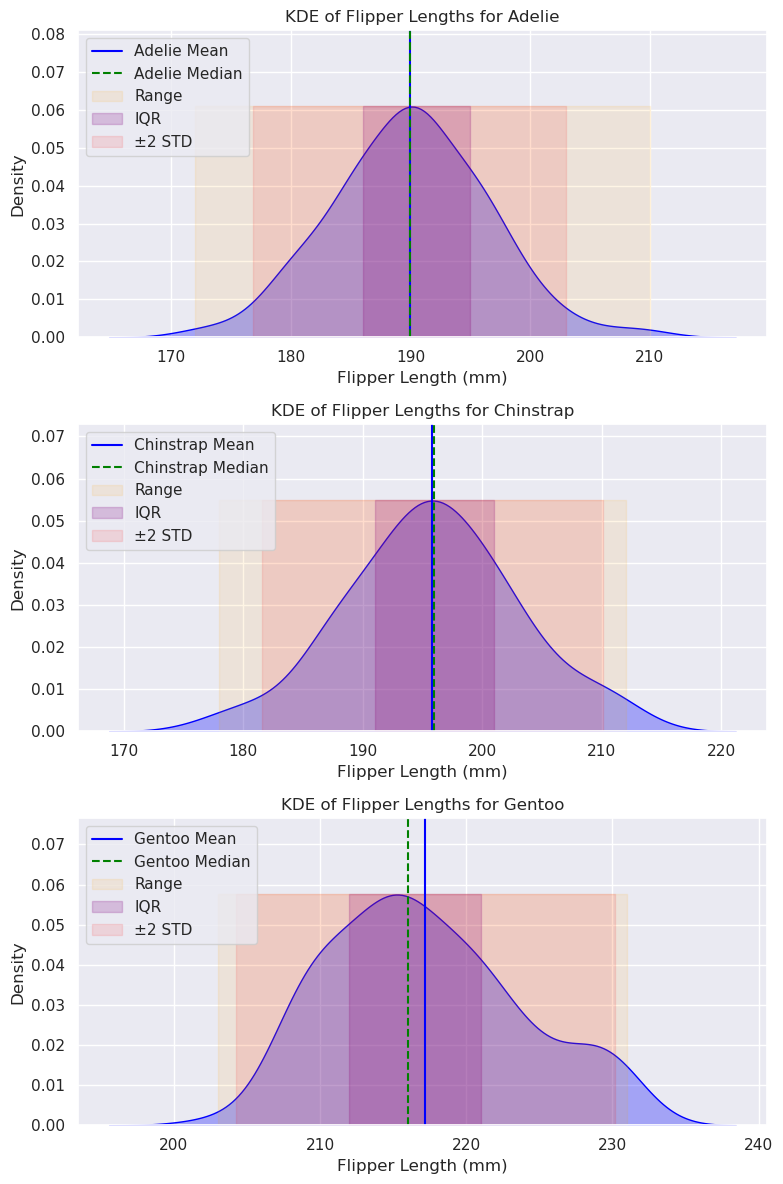

0

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_kde_with_annotations():
    try:
        # Load the seaborn dataset
        penguins = sns.load_dataset('penguins').dropna(subset=['flipper_length_mm'])

        # Set up a grid of subplots, 1 row for each species
        species_list = penguins['species'].unique()
        fig, axes = plt.subplots(nrows=len(species_list), ncols=1, figsize=(8, 12))

        # Ensure axes is always a list (in case there's only one plot)
        if len(species_list) == 1:
            axes = [axes]

        # Loop through each species
        for ax, species in zip(axes, species_list):
            data = penguins[penguins['species'] == species]['flipper_length_mm']
            
            # Calculate KDE values using gaussian_kde from scipy
            kde = gaussian_kde(data)
            x_values = np.linspace(data.min(), data.max(), 1000)
            kde_values = kde(x_values)
            y_max = kde_values.max()  # Find the maximum KDE value
            
            # Plot the KDE using seaborn
            sns.kdeplot(data, ax=ax, fill=True, color='blue', alpha=0.3)

            # Set the y-axis limit so that the KDE curve covers more than 75% of the plot area
            ax.set_ylim(0, y_max * 1.33)  # Increasing the y-limit to push the graph down and take more vertical space
            
            # Calculate statistics
            mean = data.mean()
            median = data.median()
            std = data.std()
            min_val = data.min()
            max_val = data.max()
            iqr_range = (data.quantile(0.25), data.quantile(0.75))

            # Add vertical lines for mean and median
            ax.axvline(mean, color='blue', linestyle='-', label=f'{species} Mean')
            ax.axvline(median, color='green', linestyle='--', label=f'{species} Median')

            # Add shaded areas for range, IQR, and ±2 STD
            ax.fill_betweenx(y=[0, y_max], x1=min_val, x2=max_val, color='orange', alpha=0.1, label='Range')
            ax.fill_betweenx(y=[0, y_max], x1=iqr_range[0], x2=iqr_range[1], color='purple', alpha=0.2, label='IQR')
            ax.fill_betweenx(y=[0, y_max], x1=mean - 2 * std, x2=mean + 2 * std, color='red', alpha=0.1, label='±2 STD')

            # Set plot title and labels
            ax.set_title(f'KDE of Flipper Lengths for {species}')
            ax.set_xlabel('Flipper Length (mm)')
            ax.set_ylabel('Density')
            ax.legend(loc='upper left')

        # Adjust layout to avoid overlap
        plt.tight_layout()

        # Show the plot
        plt.show()

        return 0  # Success

    except Exception as e:
        print(f"An error occurred: {e}")
        return 1  # Error code

# Run the function
plot_kde_with_annotations()


Website link of conversation between ChatBots and me:
https://chatgpt.com/c/66f613a2-4e8c-8001-b1f3-0e9459e2e8fd

Summary conversation between ChatBox and me:
In the conversation, you asked how to create Kernel Density Estimation (KDE) plots for penguin species from the 
Seaborn dataset and mark statistical properties (mean, median, range, IQR, and ±2 standard deviations) using 
Plotly. I provided code for that, but you later asked to use Seaborn and Matplotlib instead, as Seaborn builds on 
Matplotlib. The original approach using `ax.fill_between()` to shade statistical ranges had an issue with the KDE 
curve covering less than 75% of the plot height. I suggested adjusting the y-axis limits using `ax.set_ylim()` 
but ran into an `IndexError` when trying to get KDE values from the Seaborn plot. To fix this, I updated the code 
to compute KDE values directly using `scipy.stats.gaussian_kde`, ensuring the KDE area fills more than 75% of the 
graph box without errors.

### Question 3

Website link of conversation between ChatBots and me:
https://chatgpt.com/c/66f622f3-1624-8001-a851-aae8a5b67ac6
    
    
    
Summary conversation between ChatBox and me: 
Pros and Cons of Different Plots:
Box Plot:
Pros: Clearly shows mean and IQR, identifies outliers.
Cons: Lacks information on the number of data points.
Histogram:
Pros: Clearly displays the quantity of data.
Cons: Mean and median are not immediately obvious; sensitive to bin size.
KDE (Kernel Density Estimate):
Pros: Smoothly represents distribution, clearly shows mode.
Cons: Mean and median are not explicitly indicated, and quantity is less clear.

Your Preferences:
You expressed a strong preference for KDE plots, noting their beauty and ease of interpretation. 
You appreciate their ability to represent data continuously, combining strengths from both histograms and 
box plots while addressing their weaknesses.

Agreement:
I agreed with your points and emphasized the aesthetic appeal, continuous representation, flexibility, and 
informative nature of KDE plots, reinforcing their effectiveness for exploratory data analysis.

Overall, our discussion highlighted the strengths and weaknesses of various data visualization methods, with a 
focus on your preference for KDE plots.

### Question 4

In [28]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Which datasets have similar means and similar variances
AC
2.Which datasets have similar means but quite different variances
BC or AB
3.Which datasets have similar variances but quite different means
BD
4.Which datasets have quite different means and quite different variances
AD or CD

### Question 6

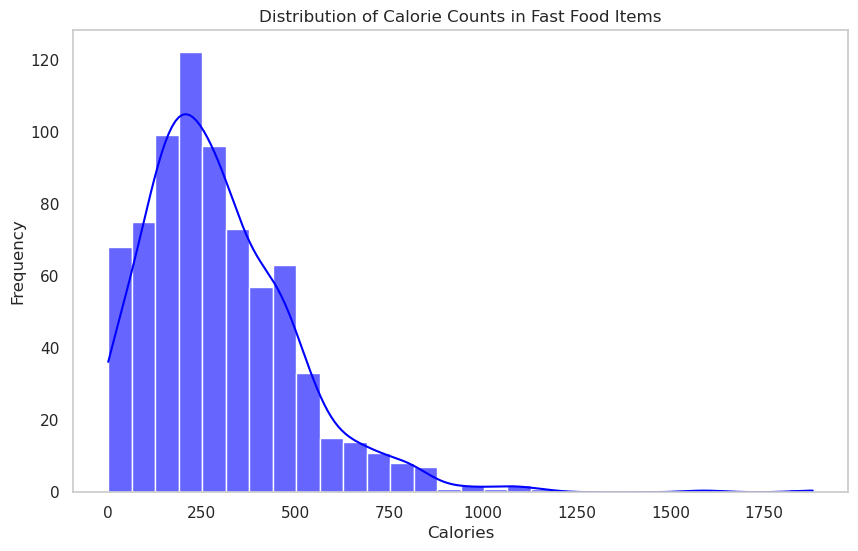

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Create a histogram for calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Calorie Counts in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid()
plt.show()
